In [189]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

In [190]:
%config InlineBackend.figure_format = "retina"

In [191]:
data = loadmat("data_lazer/dataset.mat")["dataset"]

In [192]:
data[0, 0, :]

array([ 0.00000000e+00,  3.72879323e+02,  1.06963619e+03, ...,
       -5.53628935e+06, -5.53441146e+06, -5.53244467e+06])

In [193]:
data.shape

(10, 9, 44100)

In [194]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [195]:
def rescale(X, min=-1, max=1):
    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min
    return X_scaled

In [196]:
fs =1500 # sampling frequency
# parameters of the filter
lowcut = 20 
highcut = 700
order = 8

In [197]:
n_subject, n_session = data.shape[:2]

In [198]:
filtered_data = butter_bandpass_filter(data, lowcut, highcut, fs, order=order)

scaled_data = np.zeros_like(filtered_data)

for subject in range(n_subject):
    for session in range(n_session):
        y = filtered_data[subject, session]
        #  y = butter_bandpass_filter(y, lowcut, highcut, fs, order=order)
        y = rescale(y)
        scaled_data[subject, session] = y

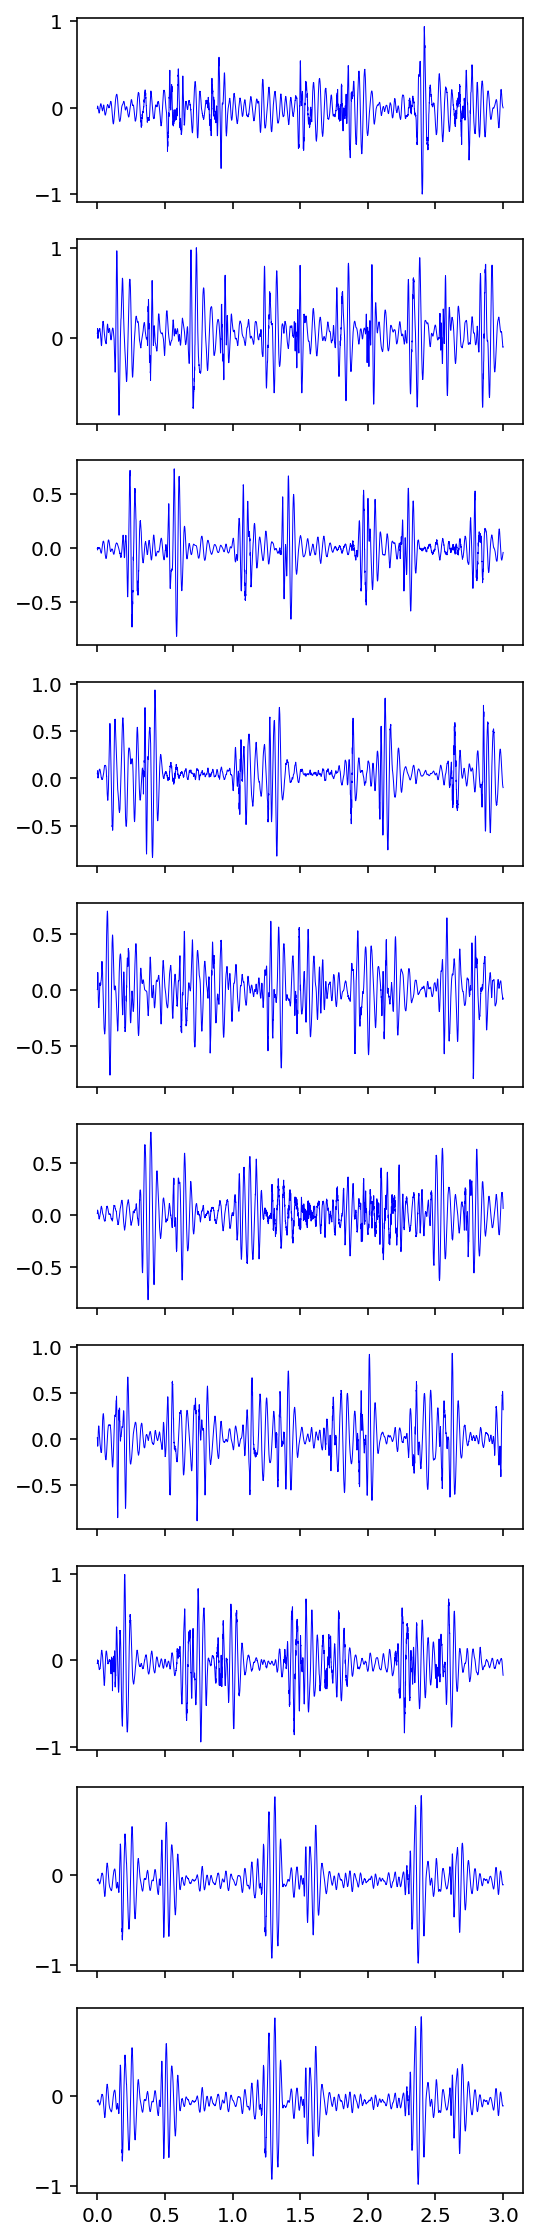

In [199]:
T = 3  # Maximum is 40 seconds
n_samples = int(T * fs)
# colors = plt.cm.Blues(np.linspace(0,1,n))

fig, axes = plt.subplots(nrows=n_subject, 
                         figsize=(4, 20), sharex=True)
t = np.linspace(0, T, n_samples)

for subject in range(n_subject):
    for session in range(n_session):
        y = scaled_data[subject, session, :n_samples]
        axes[subject].plot(t, y, "blue", lw=0.5)#c=colors[i])
        break

In [200]:
data = loadmat("data_radar/Human_radar_data.mat")['Human_radar_data']

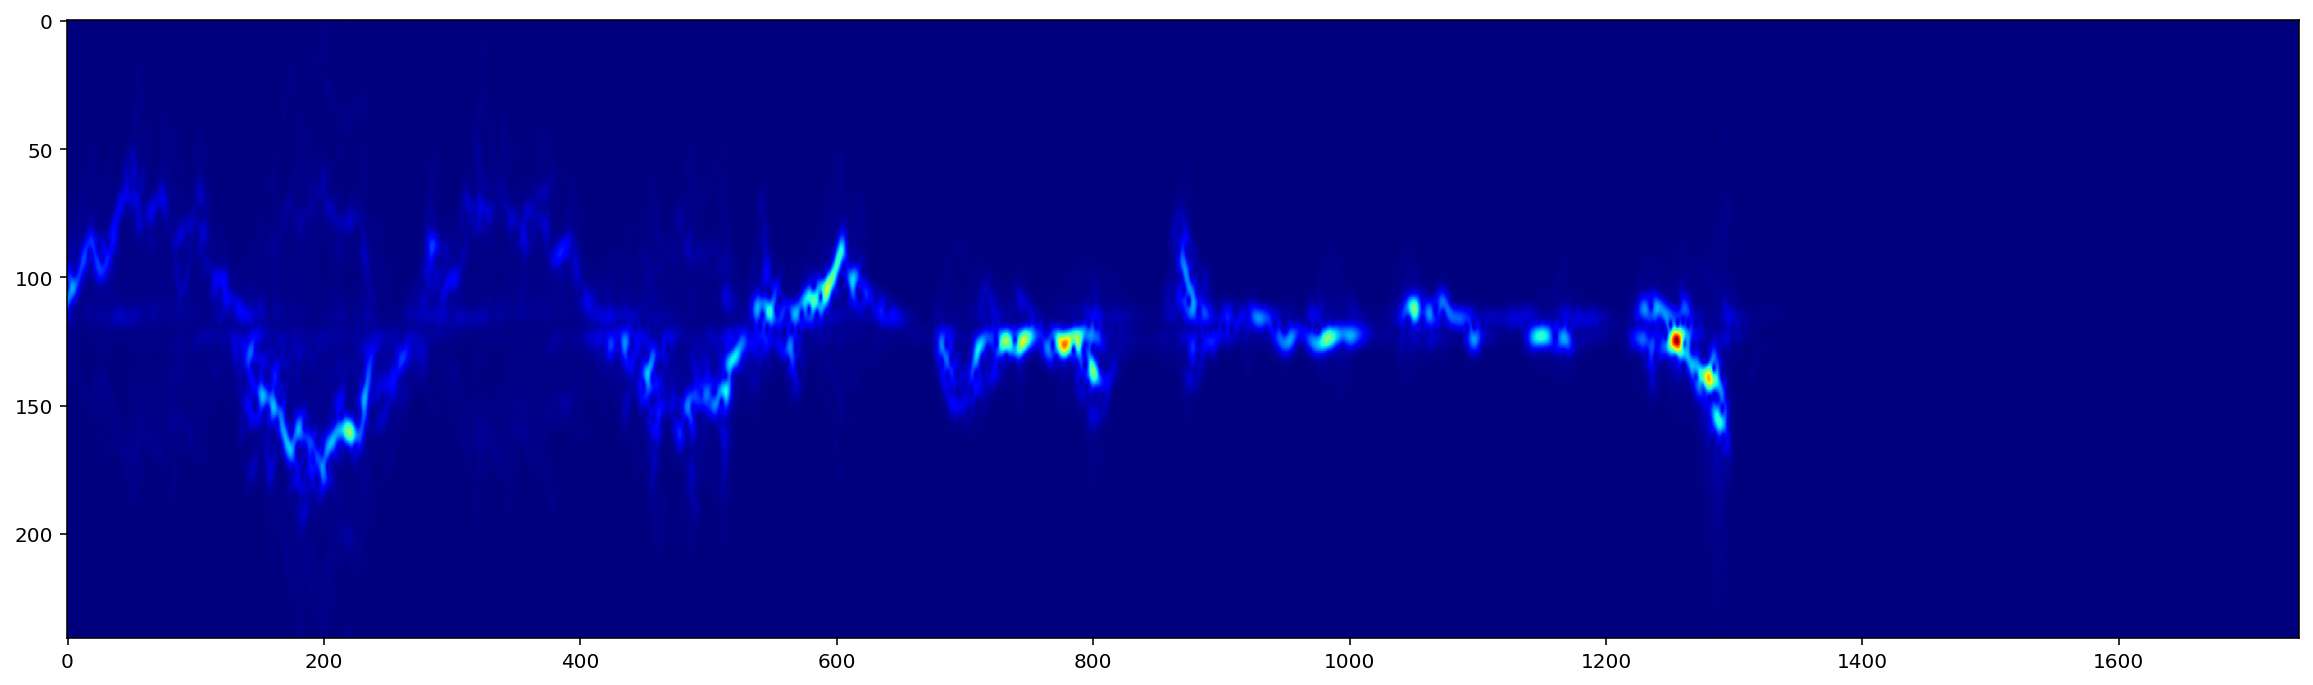

In [207]:
fig, ax = plt.subplots(figsize=(20, 10), )
ax.imshow(data[0, 0], cmap="jet", aspect=2);

In [185]:
data = loadmat("data_radar/Label_radar_data.mat")["Label_data"]

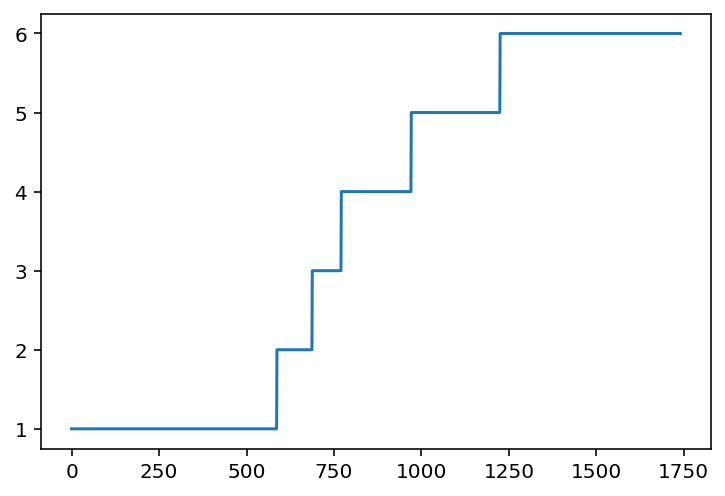

In [187]:
plt.plot(data[0, 0].flatten());